# Lista 2
-------------


Objetivo: treinar um modelo de classificação utilizando o modelo random Forest e XGBoost.


Banco utilizado: Detecção de doenças no fígado.


[Link](https://drive.google.com/file/d/1jnLwuv4e_ZeCqluMXs3Mar2TGetumtVv/view?usp=drive_link) para o banco


Descrição do banco:
> Este banco contém registro de 416 pacientes diagnosticados com doença no fígado e 167 pacientes sem. Esta informação está na coluna Selector.
>
> Há 10 variáveis no banco:
>
> * age: idade
> * Gender: gênero do paciente
> * TB: Bilirrubina total
> * DB: Bilirrubina direta
> * Alkphos: fosfatase alcalina.
> * Sgpt: transaminase glutâmico-pirúvica sérica (TGP)
> * Sgot: transaminase glutâmico-oxalacética sérica (TGO)
> * TP: Proteína total
> * ALB: Albumina
> * A/G Ratio: Relação Albumina:Globulina


Exercício:


1. Carregue o banco de dados e analise suas features. Transforme a feature sexo em uma variavel dummy.
2. Separe o banco em 80% para treino e 20% para teste.
3. Treine um modelo de Random Forest com parâmetros de n_estimators de 150 e max_depth de 5.
  3.1 Quais são as duas features mais importantes?
4. Treine um modelo de XGboost com parâmetros de max_depth de 5, learning rate de 0.1 e n_estimators de 150.
  4.1 Quais são as duas features mais importantes?


5. Construa um report dos dois modelos.
  5.1 Tomando como decisão a precisão para detectar doença no fígado qual é o melhor modelo?
 5.2 Tomando como decisão o f1 score do rótulo de pacientes com doença no fígado qual é o melhor modelo?


Obs.: Utilize o **mesmo** banco de treino e de teste para construir e avaliar os dois modelos.



In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [45]:
## modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb

In [57]:
##  metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import train_test_split

## 1. Carga do banco
--------------------

In [7]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [8]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## 2. Quebra do banco
--------------------

In [9]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [12]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [13]:
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [19]:
inpt = SimpleImputer(missing_values = np.nan, strategy="median")

In [20]:

df["A/G Ratio"] = inpt.fit_transform(df[["A/G Ratio"]])

Usei o simpleImputer para substituir as variavies NaN como eram apenas 4 usei a mediana.

In [22]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64

In [33]:
df_dummy = pd.get_dummies(df["Gender"])
df_d = pd.concat([df, df_dummy], axis=1)


df_d.drop(columns=["Gender"], axis=1, inplace=True)


In [34]:
df_d.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,True,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,False,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,False,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,False,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,False,True


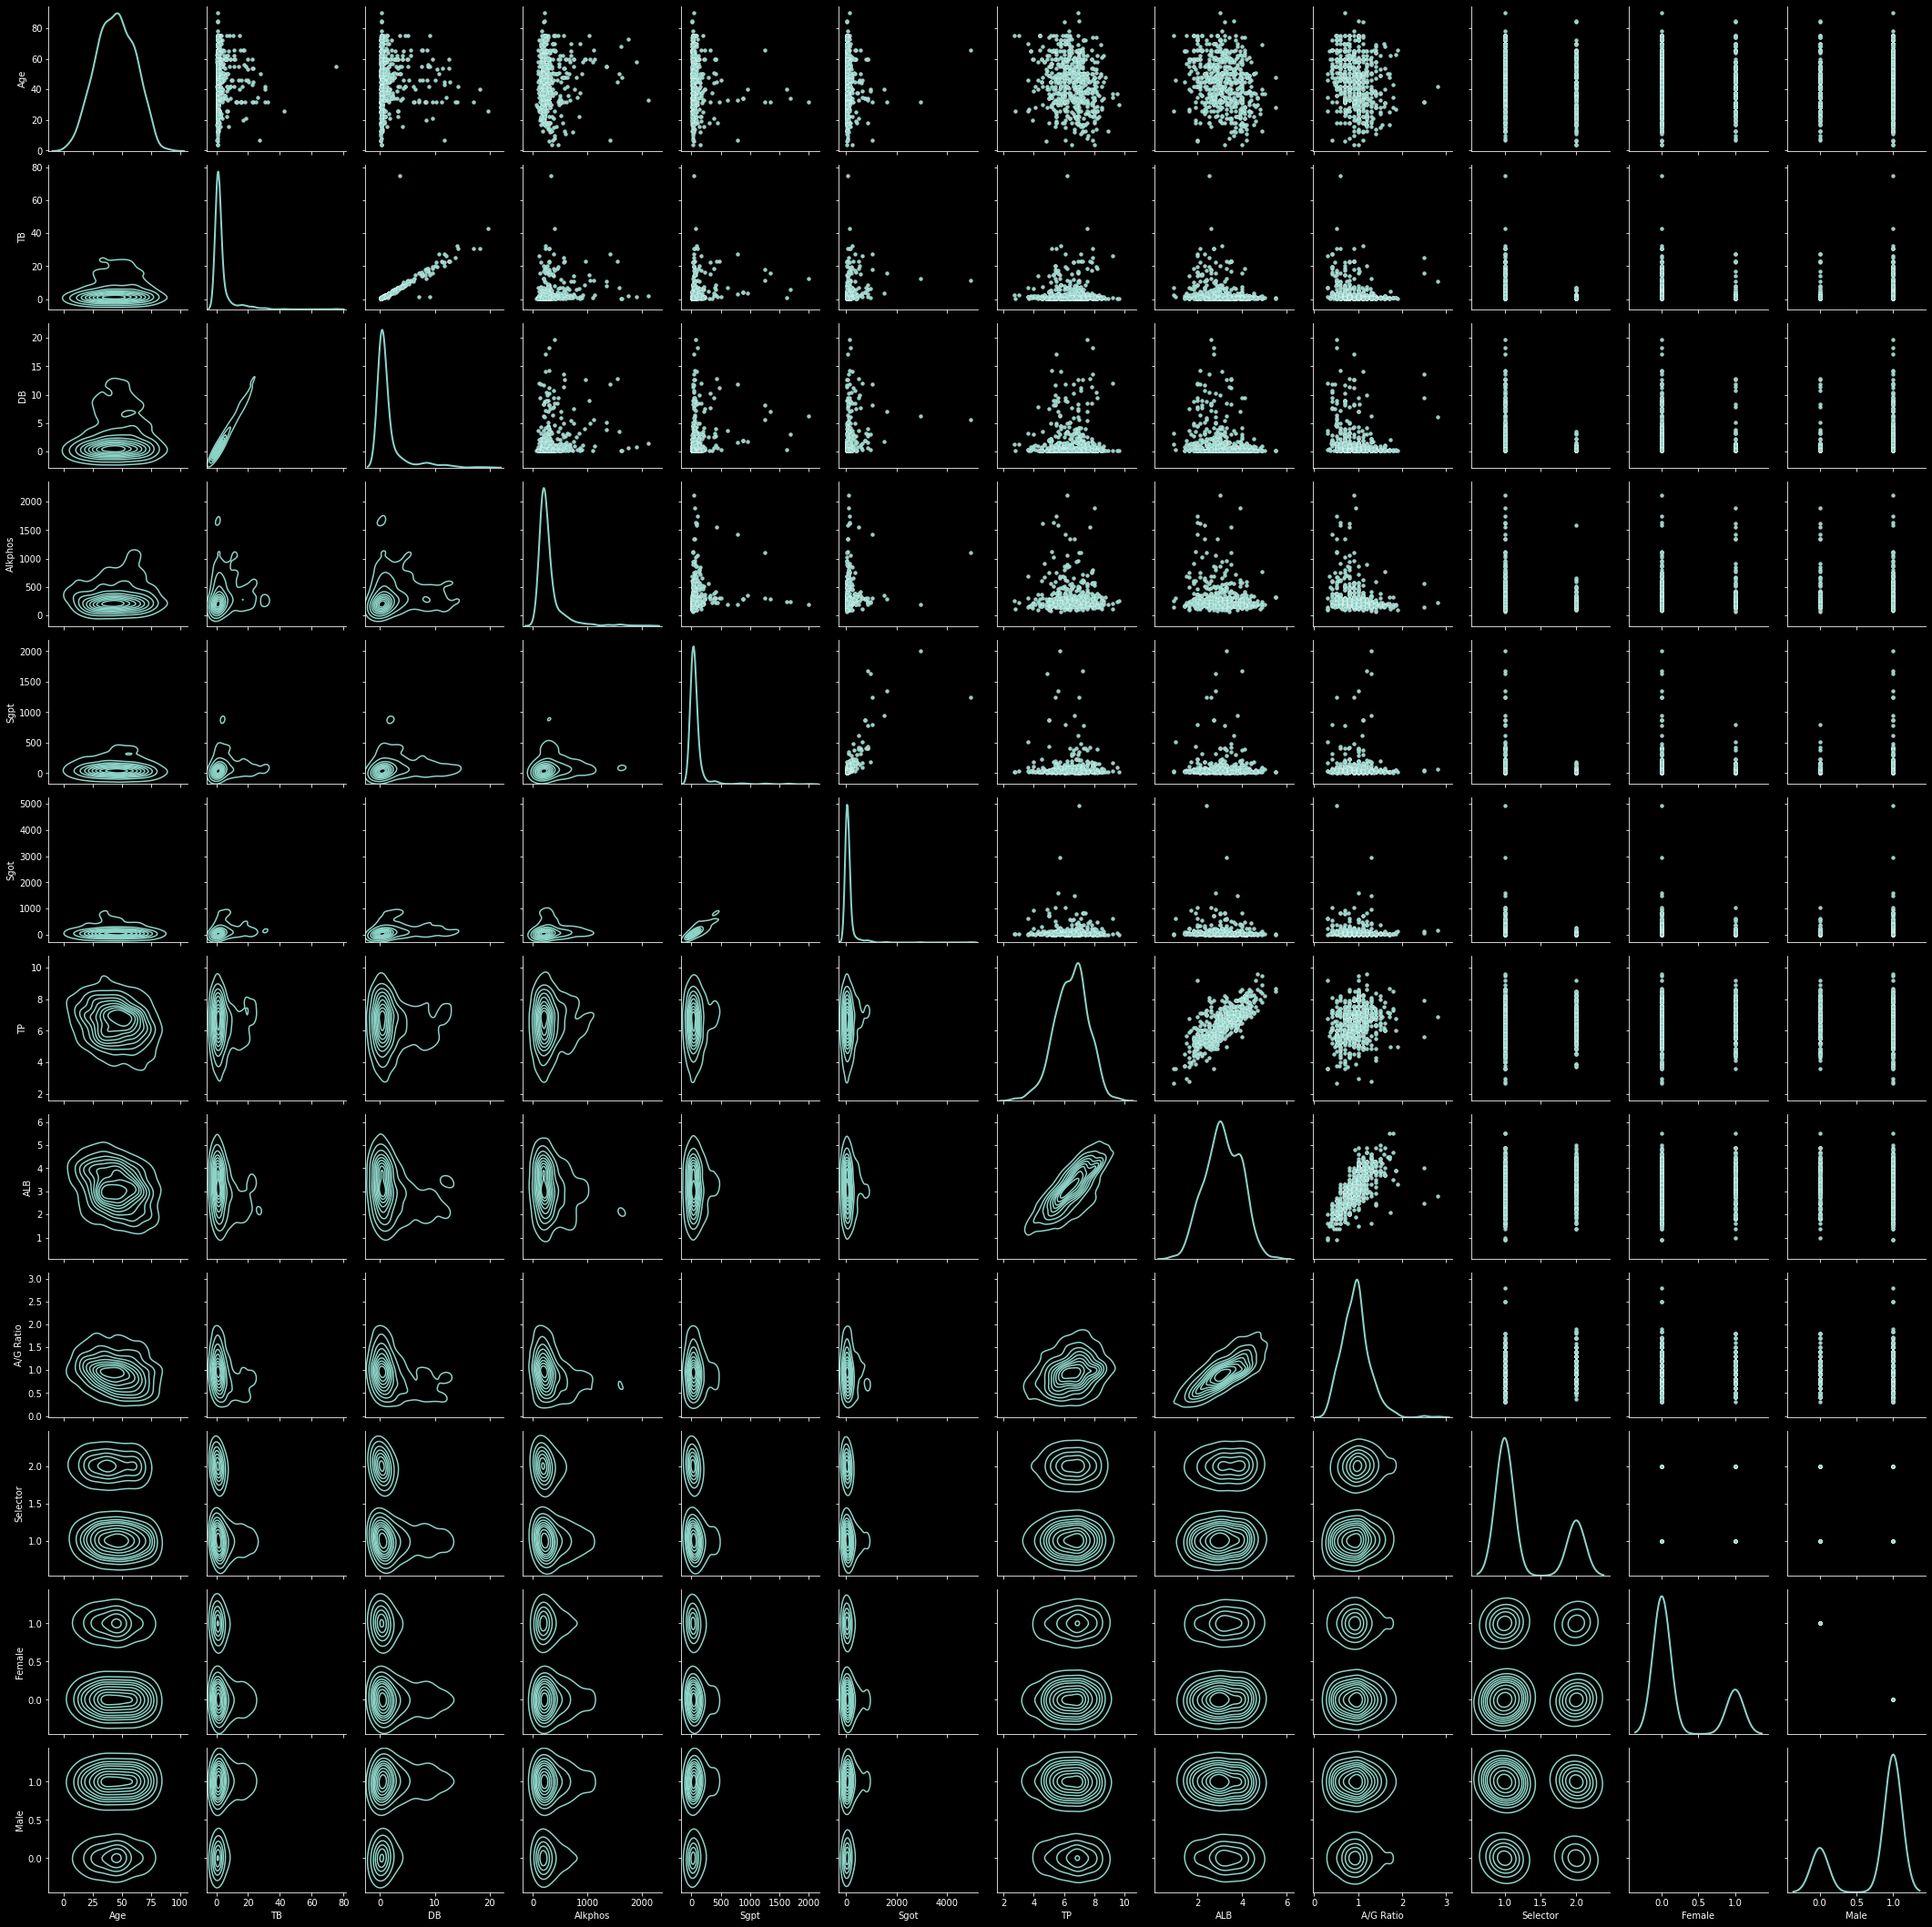

In [35]:
graph = sns.PairGrid(df_d, diag_sharey=False)
graph.map_upper(sns.scatterplot, s=15)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot, lw=2)

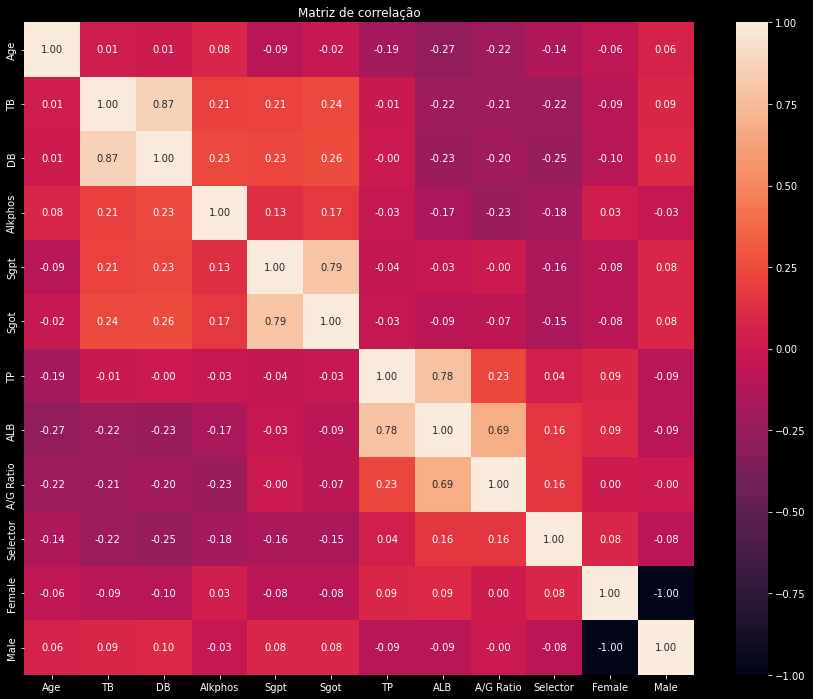

In [37]:
matrix_corr = df_d.corr()

plt.figure(figsize=(15,12))
plt.title("Matriz de correlação")
sns.heatmap(matrix_corr, annot=True, fmt=".2f")
plt.show()

In [38]:
X = df_d.drop(columns=["Selector"])
y = df_d[["Selector"]]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

## 3. Primeiro modelo
--------------------

In [47]:
model_rf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=15)

In [48]:
model_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=150, random_state=15)

In [49]:
imp = model_rf.feature_importances_

In [51]:
f_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': imp})

In [53]:
df_f_rf = f_imp.sort_values(by='Importance', ascending=False)

In [56]:
print("As features mais importantes são: \n", df_f_rf.head(2))

As features mais importantes são: 
    Feature  Importance
3  Alkphos    0.155938
4     Sgpt    0.152122


## 3.1 Interpretação de dois coeficientes
--------------------

In [58]:
y_pred = model_rf.predict(X_test)b

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[83  5]
 [25  4]]


In [60]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.94      0.85        88
           2       0.44      0.14      0.21        29

    accuracy                           0.74       117
   macro avg       0.61      0.54      0.53       117
weighted avg       0.69      0.74      0.69       117



In [61]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.8469387755102041


In [62]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.5405564263322884


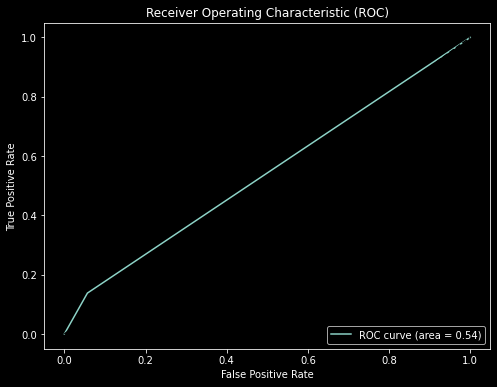

In [64]:
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

## 4. Segundo modelo
----

In [66]:
model_xgb = xgb.XGBClassifier(n_estimators=150, max_depth=5, random_state=15)


In [69]:
y_train

,Selector
271,2
294,1
121,1
128,1
18,1
...,...
85,1
199,1
156,1
384,1


In [73]:
y_train = y_train.map(lambda x: 0 if x == 1 else 1)
y_test = y_test.map(lambda x: 0 if x == 1 else 1)


In [74]:
y_train

,Selector
271,0
294,1
121,1
128,1
18,1
...,...
85,1
199,1
156,1
384,1


In [75]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=15, ...)

In [76]:
y_pred_xgb = model_xgb.predict(X_test)

## 4.1 Duas features mais importantes
--------------------

## 5. Avaliação do modelo
--------------------

In [78]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Matriz de Confusão (XGBoost):")
print(conf_matrix_xgb)

Matriz de Confusão (XGBoost):
[[11 77]
 [10 19]]


In [79]:
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report (XGBoost):")
print(report_xgb)

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.52      0.12      0.20        88
           1       0.20      0.66      0.30        29

    accuracy                           0.26       117
   macro avg       0.36      0.39      0.25       117
weighted avg       0.44      0.26      0.23       117



In [82]:
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1-Score (XGBoost):", f1_xgb)

F1-Score (XGBoost): 0.304


In [84]:
 roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("ROC-AUC Score (XGBoost):", roc_auc_xgb)

ROC-AUC Score (XGBoost): 0.3900862068965517


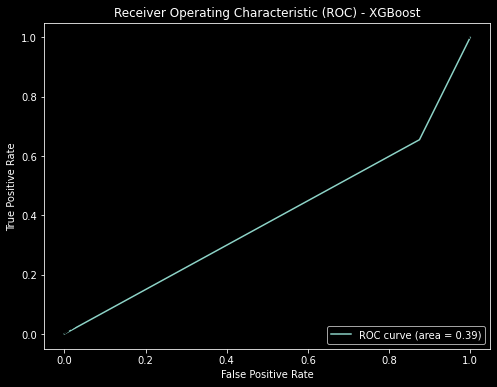

In [86]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.show()

## 5.1 Qual modelo escolhido olhando para a precisão de detecção de doença no fígado?
--------------------

Olhandodo para a precisão o melhor modelo é o do Random Forest.

## 5.2 Qual modelo escolhido olhando para o f1-score do rótulo de doença do fígado?
--------------------

Análisando o f1-score também temos o melhor modelo como o Random Forest.